In [2]:
import pandas as pd 
import numpy as np 

In [3]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [4]:
from sklearn.datasets import make_moons

In [5]:
import matplotlib.pyplot as plt

In [6]:
x,y = make_moons(n_samples=1000,noise=0.2,random_state=1)

In [7]:
x


array([[ 0.26291213,  0.2249473 ],
       [ 1.38248998, -0.71053075],
       [-0.75429824, -0.00371023],
       ...,
       [ 1.81008683,  0.16025471],
       [ 0.19901279,  0.75494059],
       [ 1.25535319,  0.43164204]])

In [8]:
y

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,

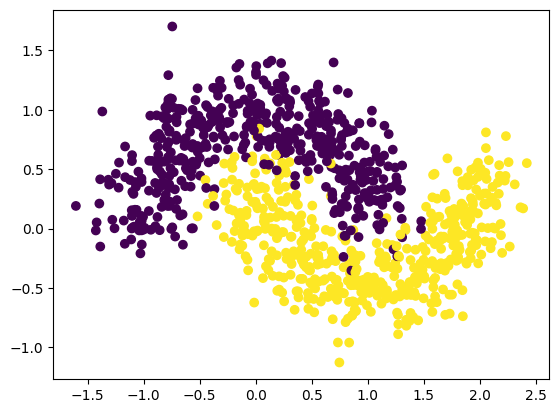

In [9]:
plt.scatter(x[:,0],x[:,1],c=y)

In [10]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

d:\python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.get_weights()

[array([[-0.36364368,  0.6292116 , -0.58159614, -0.17923552,  0.2996388 ,
         -0.33680084,  0.15553129,  0.34960765, -0.0728687 , -0.23512867],
        [ 0.6146379 , -0.05180705, -0.46803975, -0.3773768 , -0.47554255,
          0.42783052, -0.2941113 ,  0.6605721 , -0.1349935 , -0.02004856]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.40994647],
        [ 0.59681326],
        [-0.4138013 ],
        [ 0.39450997],
        [-0.155451  ],
        [-0.2997344 ],
        [-0.44977275],
        [-0.49647316],
        [ 0.26410204],
        [-0.4735194 ]], dtype=float32),
 array([0.], dtype=float32)]

In [13]:
initial_weights = model.get_weights()
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [14]:
model.set_weights(initial_weights)

In [15]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4886 - loss: 0.6932 - val_accuracy: 0.5150 - val_loss: 0.6931
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4609 - loss: 0.6932 - val_accuracy: 0.4850 - val_loss: 0.6932
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4341 - loss: 0.6932 - val_accuracy: 0.4850 - val_loss: 0.6932
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5249 - loss: 0.6931 - val_accuracy: 0.4850 - val_loss: 0.6932
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5251 - loss: 0.6931 - val_accuracy: 0.4850 - val_loss: 0.6932
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4996 - loss: 0.6932 - val_accuracy: 0.4850 - val_loss: 0.6932
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5069 - loss: 0.6931 - val_accuracy: 0.4850 - val_loss: 0.6932
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5121 - loss: 0.6931 - val_accuracy: 0.4850 - 

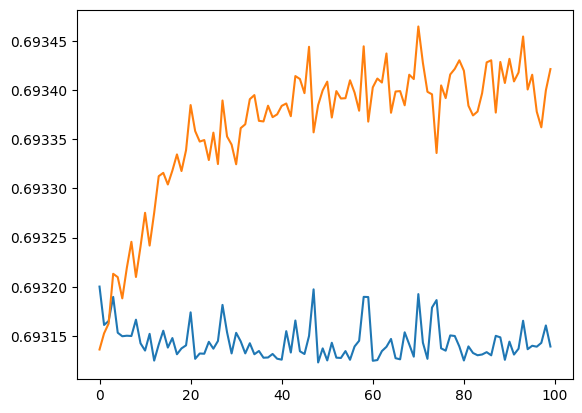

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [23]:
model1 = Sequential()

model1.add(Dense(10,activation='relu',input_dim=2))
model1.add(Dense(1,activation='relu'))

d:\python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model1.get_weights()

[array([[ 0.56136006,  0.22786134, -0.07690096, -0.13161969,  0.66169256,
         -0.14698833, -0.12242246, -0.5139242 ,  0.20148063,  0.5789208 ],
        [ 0.6492471 , -0.03148353,  0.5254094 , -0.3761598 , -0.42033103,
         -0.1600663 ,  0.2472555 , -0.21696523,  0.01300144, -0.22659561]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.23240209],
        [-0.02635252],
        [-0.03527695],
        [ 0.7328926 ],
        [-0.2809982 ],
        [ 0.06040323],
        [ 0.07319325],
        [-0.58774006],
        [-0.46847004],
        [ 0.4233516 ]], dtype=float32),
 array([0.], dtype=float32)]

In [26]:
model1.set_weights(initial_weights)

In [27]:
model1.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [28]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 

In [37]:
history1 = model1.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5070 - loss: 7.9461 - val_accuracy: 0.4850 - val_loss: 8.3008
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4962 - loss: 8.1199 - val_accuracy: 0.4850 - val_loss: 8.3008
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5245 - loss: 7.6641 - val_accuracy: 0.4850 - val_loss: 8.3008
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5390 - loss: 7.4309 - val_accuracy: 0.4850 - val_loss: 8.3008
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4968 - loss: 8.1102 - val_accuracy: 0.4850 - val_loss: 8.3008
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4967 - loss: 8.1119 - val_accuracy: 0.4850 - val_loss: 8.3008
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5027 - loss: 8.0162 - val_accuracy: 0.4850 - val_loss: 8.3008
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4894 - loss: 8.2306 - val_accuracy: 0.4850 - 

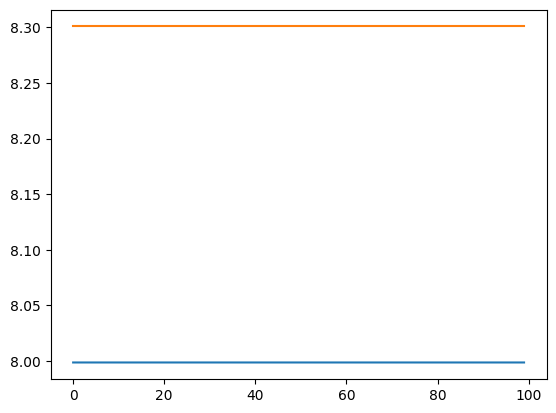

In [38]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])